# Group Project 1 - Retrospective Analysis

## Industry Identification
In an era with drastic development in the digital content creation industry, more and more individuals turn their gear towards this market. In this analysis, we take the position as a consulting team for individual or group influencers to help them determine what factors besides the content itself contribute to some of the most trending videos on YouTube. 
## Problem Statement
Our goal is to provide suggestions that help them get more likes and views on their publised YouTube videos. We will determine which factors influencers should focus on and how each factor affects the popularity of the video.
## Lean Canvas
<img src="LeanCanvas.png" width="900" height="700">

In [3]:
# Key imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# We import the dataset and display the dirst five rows to visually examine it
df = pd.read_csv("USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
# Gain a basic understanding of the dataset and see if there are missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

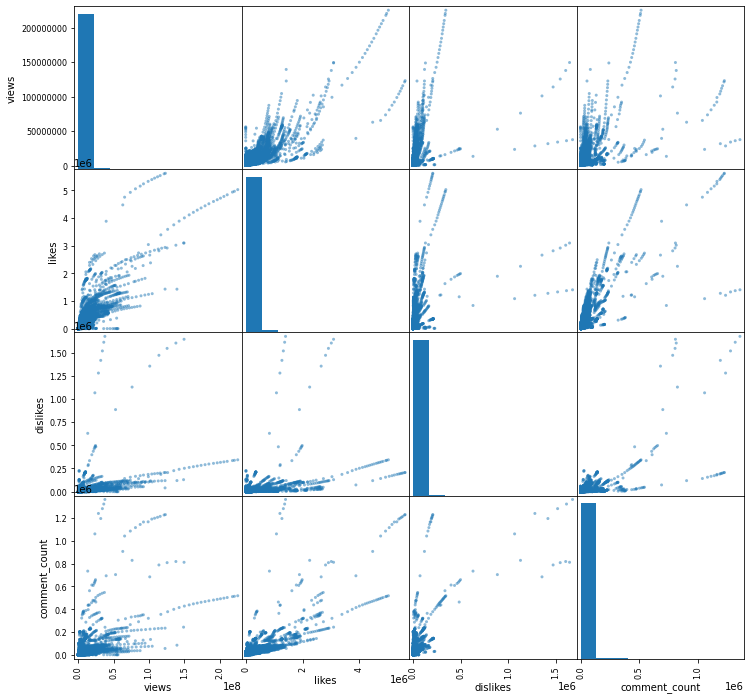

In [13]:
# Visualize each numerical factor and have a quick look at their distributions and correlations
pd.plotting.scatter_matrix(df[['views','likes','dislikes','comment_count']],figsize=(12,12))
plt.show()

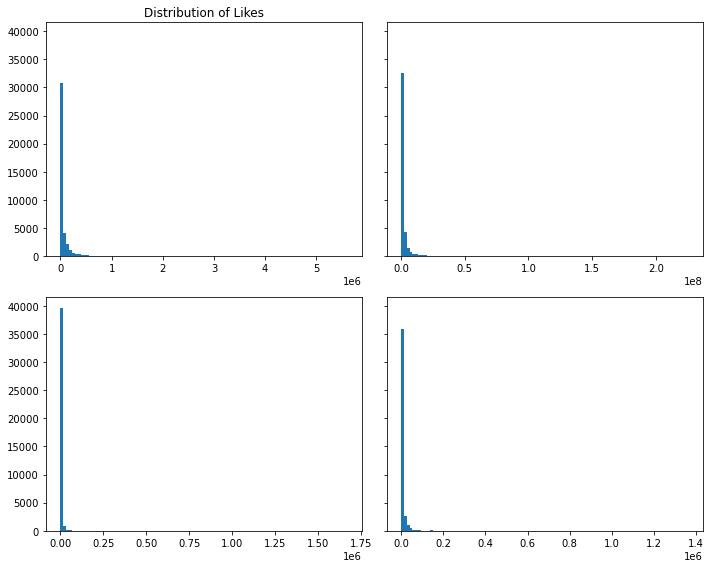

In [32]:
# Closer look at each distribution because we observed log-normality
fig, axs = plt.subplots(2,2,figsize=(10,8),sharey=True,tight_layout=True)

axs[0,0].hist(df['likes'],bins=100)
axs[0,0].set_title("Distribution of Likes")
axs[0,1].hist(df['views'],bins=100)
axs[1,0].hist(df['dislikes'],bins=100)
axs[1,1].hist(df['comment_count'],bins=100)
plt.show()

In [34]:
df['log_likes'] = np.log(df['likes']+1)
df['log_views'] = np.log(df['views']+1)
df['log_comment_count'] = np.log(df['comment_count']+1)
df['log_dislikes'] = np.log(df['dislikes']+1)

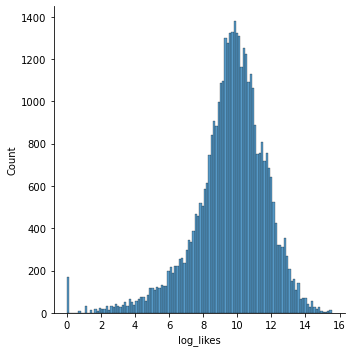

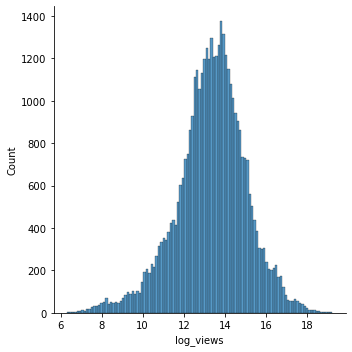

In [36]:
sns.displot(df['log_likes'])
sns.displot(df['log_views'])